Sascha Spors,
Professorship Signal Theory and Digital Signal Processing,
Institute of Communications Engineering (INT),
Faculty of Computer Science and Electrical Engineering (IEF),
University of Rostock,
Germany

# Data Driven Audio Signal Processing - A Tutorial with Computational Examples

Winter Semester 2024/25 (Master Course #24512)

- lecture: https://github.com/spatialaudio/data-driven-audio-signal-processing-lecture
- tutorial: https://github.com/spatialaudio/data-driven-audio-signal-processing-exercise

Feel free to contact lecturer frank.schultz@uni-rostock.de

# Homework Template

Make sure that you copy the template and the groudn truth data into mnt/home/... to have persistent storage. All data in the virtual machine is lost, once the virtual machine is deleted.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import tensorflow as tf
from tensorflow import keras

In [2]:
# we can use PyTorch or TensorFlow with Keras
torch.__version__, tf.__version__, keras.__version__

('2.3.0', '2.17.0', '3.4.1')

In [3]:
# we might want to use double precision in PT / TF as ground truth data is dtype=float64
torch.set_default_dtype(torch.float64)
tf.keras.backend.set_floatx('float64')

In [4]:
# load provided ground truth data
x = np.load('ground_truth_data_x.npy')
y = np.load('ground_truth_data_y.npy')
y = y[:, None]  # make it a column vector

print(x.dtype, y.dtype)

N, F = x.shape[0], x.shape[1]
print('data samples N:', N, '\nfeatures F:', F)

# make sure x is full column rank -> then a left-inverse exists
print('x is full column rank:', np.linalg.matrix_rank(x) == F)

float64 float64
data samples N: 1000 
features F: 2
x is full column rank: True


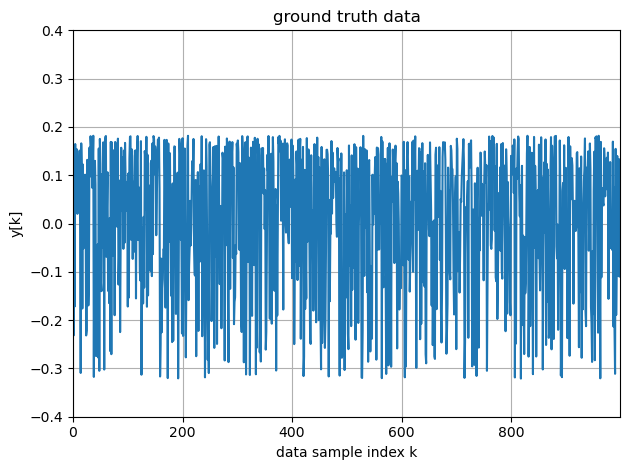

In [5]:
# plot data
plt.plot(np.arange(N), y)
plt.xlabel('data sample index k')
plt.ylabel('y[k]')
plt.title('ground truth data')
plt.xlim([0, N-1])
plt.ylim([-0.4, +0.4])
plt.grid(True)
plt.tight_layout()

In [6]:
# simple linear model, train with full data set
x_left_inverse = np.linalg.inv(x.T @ x) @ x.T
w = x_left_inverse @ y  # get weights via left inverse = train the model
y_predict = x @ w  # predict = forward propagation

# get residual e, loss L & empirical risk ER
e = y - y_predict
L = e.T @ e
ER = L / N
print('empirical risk:', ER[0, 0])  # 0.003427800540873722 = 3.427800540873722e-3
# non-linear model in homeweork task has ER = 5.7457115873891e-5
# so it might explain the data better than the simple non-linear model
# in fact the ground truth data y=f(x) originates from a non-linear function f
# hence a linear model must somehow fail to do a good prediction job

empirical risk: 0.003427800540873722


## Copyright

- the notebooks are provided as [Open Educational Resources](https://en.wikipedia.org/wiki/Open_educational_resources)
- the text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/)
- the code of the IPython examples is licensed under the [MIT license](https://opensource.org/licenses/MIT)
- feel free to use the notebooks for your own purposes
- please attribute the work as follows: *Frank Schultz, Data Driven Audio Signal Processing - A Tutorial Featuring Computational Examples, University of Rostock* ideally with relevant file(s), github URL https://github.com/spatialaudio/data-driven-audio-signal-processing-exercise, commit number and/or version tag, year.